# 康威尔生命游戏

+ https://playgameoflife.com/
+ https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
+ https://leetcode.cn/problems/game-of-life/

## 游戏规则

给定一个包含 m × n 个格子的面板，每一个格子都可以看成是一个细胞。每个细胞都具有一个初始状态： 1 即为 活细胞 （live），或 0 即为 死细胞 （dead）。

每个细胞与其八个相邻位置（水平，垂直，对角线）的细胞都遵循以下四条生存定律：

1. 如果活细胞周围八个位置的活细胞数少于两个，则该位置活细胞死亡；

2. 如果活细胞周围八个位置有两个或三个活细胞，则该位置活细胞仍然存活；

3. 如果活细胞周围八个位置有超过三个活细胞，则该位置活细胞死亡；

4. 如果死细胞周围正好有三个活细胞，则该位置死细胞复活；

下一个状态是通过将上述规则同时应用于当前状态下的每个细胞所形成的，其中细胞的出生和死亡是同时发生的。给你 m x n 网格面板 board 的当前状态，返回下一个状态。

### 运行环境

*笔记中的动画使用 [algviz算法动画引擎](https://zjl9959.github.io/algviz/) 渲染，环境配置请参考该链接：[https://zjl9959.github.io/algviz/cn/installation.html](https://zjl9959.github.io/algviz/cn/installation.html)*

*觉得对你有帮忙的话请给👉[algviz开源项目](https://github.com/zjl9959/algviz)👈点个 Star✨，遇到了问题也可以在这里 [报个bug](https://github.com/zjl9959/algviz/issues)！*

In [13]:
import algviz

class Solution:
  def gameOfLife(self, board, m, n):
    lives = [[0 for j in range(n)] for i in range(m)]
    for i in range(m):
      for j in range(n):
        if i > 0:
          lives[i][j] += board[i-1][j]
          if j > 0:
            lives[i][j] += board[i-1][j-1]
          if j < n - 1:
            lives[i][j] += board[i-1][j+1]
        if i < m - 1:
          lives[i][j] += board[i+1][j]
          if j > 0:
            lives[i][j] += board[i+1][j-1]
          if j < n - 1:
            lives[i][j] += board[i+1][j+1]
        if j > 0:
          lives[i][j] += board[i][j-1]
        if j < n - 1:
          lives[i][j] += board[i][j+1]
    for i in range(m):
      for j in range(n):
        if board[i][j] == 1:
          if lives[i][j] < 2 or lives[i][j] > 3:
            board[i][j] = 0
        else:
          if lives[i][j] == 3:
            board[i][j] = 1

  def run(self, board, max_iter):
    self.viz = algviz.Visualizer(0.3, 0.3)
    m = len(board)
    n = len(board[0])
    self.table = self.viz.createTable(m, n, board, '生命游戏', (25, 25), False)
    cur_iter = 0
    while cur_iter < max_iter:
      for i in range(m):
        for j in range(n):
          if self.table[i][j] == 1:
            self.table.mark(algviz.color_yellow, i, j)
      self.viz.display()
      self.gameOfLife(self.table, m, n)
      cur_iter += 1

生命游戏:

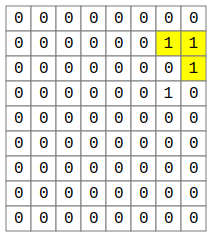

In [14]:
# 滑翔机
solver = Solution()
board = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
  ]
solver.run(board, 15)